# Introduction to the NeuroInformatics Platform - FENS 2016 - Part 2

# The KnowledgeGraph


# Querying for data available about the thalamus

<BR><BR>

## From the NIP website (https://nip.humanbrainproject.eu/search/).
As can be seen, the datasets available through the NeuroInformatics Platform can be easily searched by keywords and then downloaded simply by clicking on provided links. 

<img src="https://s32.postimg.org/ldeq7apqd/Screenshot_from_2016_06_21_16_56_16.png" width="100%" height="100%"></img>


<BR><BR>
----------------
----------------
<BR><BR>

## From the KSearch API website (https://nip.humanbrainproject.eu/api/ksearch/swagger/index.html)


<img src="https://s31.postimg.org/9su8h46wb/Screenshot_from_2016_06_21_16_51_43.png" width="100%" height="100%"></img>

<CENTER><H1>...</H1></CENTER>

<img src="https://s32.postimg.org/ytnc7l2ed/Screenshot_from_2016_06_21_16_37_19.png" width="100%" height="100%"></img>

## Using this interface, you will get the same JSON response in the "Response Body" field of the form than by querying in Python as we show below.

In [1]:
# Defining the end-point for querying the REST service of the KnowledgeGraph.
base = "https://nip.humanbrainproject.eu/api/ksearch"

# Defining a function to display json strings nicely
import json
def jsonPrettyPrint(jsonStr):
    print json.dumps(jsonStr, sort_keys=True,
                  indent=4, separators=(',', ': '))
    
import requests

## First, we display the types of filter available for search in the KnowledgeGraph

In [2]:
requests.get(base + "/datasets/filters")

print("Filters available for searching the KnowledgeGraph: ")
for item in requests.get(base + "/datasets/filters").json():
    print("\t - " + item["name"])

Filters available for searching the KnowledgeGraph: 
	 - species
	 - methods
	 - protocols
	 - classifications
	 - data_modalities
	 - affiliations
	 - brain_regions


## Then, we list the types of storage available... 
As can be seen, two storage types are available, one based on Zenodo (from the CERN, which agreed to host databases for the Human Brain Project) and another managed directly by the HBP team. 

In [3]:
jsonPrettyPrint(requests.get(base + "/datasets/storage/types").json())

[
    {
        "curie": "HBP_STO:0000007",
        "description": "Zenodo builds and operates a service that enables researchers to share and preserve research results.",
        "name": "Zenodo",
        "term_suggest": {
            "output": "Zenodo [HBP_STO:0000007]"
        }
    },
    {
        "curie": "HBP_STO:0000008",
        "description": "Repository maintined by Human Brain Project.",
        "name": "HBP Document service",
        "term_suggest": {
            "output": "HBP Document service [HBP_STO:0000008]"
        }
    }
]


## We can now query for data concerning the thalamus. 
Note that, here, we used "thalamus" as a general keyword rather than specifying explicitly that it should be the region of the cell. This is identical to the search performed previously using the web interface. As promessed, this output is identical to what would have been obtained in the "Response Body" field of the Swagger-based form. Arguably, the JSON output is rather verbose...

In [4]:
query = "?q=thalamus"
response = requests.get(base + "/search" + query)
jsonPrettyPrint(response.json())

{
    "aggregations": [
        {
            "buckets": [
                {
                    "doc_count": 1,
                    "key": "Slice Staining for Morphological Cell Reconstruction"
                },
                {
                    "doc_count": 1,
                    "key": "Slice Extraction for Electrophysiology Experiments"
                },
                {
                    "doc_count": 1,
                    "key": "Morphological Reconstruction of a Single Cell"
                },
                {
                    "doc_count": 1,
                    "key": "Labeling of Cells for Morphological Reconstruction"
                }
            ],
            "field": "protocols.title.raw_term",
            "join_back_level": "Dataset",
            "name": "Protocols",
            "total": 4
        },
        {
            "field": "methods.term.raw_term",
            "join_back_level": "Dataset",
            "name": "Methods",
            "total": 0
        

... but contains all the necessary information which, once appropriatly parsed, can be displayed in a similar format than the result obtained with the search performed using the web interface.

In [5]:

ids = []
for hit in response.json()["hits"]:
    print "Title:\t\t" + hit["source"]["title"]
 
    print "Data type:\t" + hit['source']['representations'][0]['datatype']['term']
    print "Storage type:\t" + hit['source']['representations'][0]['storagetype']['term']

    accessId = hit['source']['representations'][0]['access']
    print "Access ID:\t" + accessId
    ids.append(accessId)
    
    contributorNames = [contributor["first_name"] + " " + contributor["last_name"] 
                        for contributor in hit["source"]["contributors"]]
    print "Contributors:\t" + ", ".join(contributorNames)

    species = [specimen["species"]["term"] for specimen in hit["source"]["specimen"]]
    print "Species:\t" + ", ".join(species)
    
    regions = [region["term"] for region in hit["source"]["brain_regions"]]
    print "Brain location:\t" + ", ".join(regions)
    
    cellTypes = [cellType["term"] for cellType in hit["source"]["classifications"]]
    print "Cell types:\t" + ", ".join(cellTypes)  
    
    protocols = [protocol["title"] for protocol in hit["source"]["protocols"]]
    print "Protocols:\t" + "\n\t\t".join(protocols) 


Title:		Morphology reconstruction [RP100427-123_IDG.asc]
Data type:	Neurolucida ASC
Storage type:	HBP Document service
Access ID:	f0a914f7-71ed-4ecd-adc3-abcbb8a95028
Contributors:	Henry Markram, Rodrigo Perin, Meystre Julie, Zoltan Kisvarday
Species:	Rattus norvegicus
Brain location:	Somatosensory cortex hindlimb layer VI
Cell types:	Narrow pyramidal cell projecting to thalamus
Protocols:	Morphological Reconstruction of a Single Cell
		Slice Staining for Morphological Cell Reconstruction
		Labeling of Cells for Morphological Reconstruction
		Slice Extraction for Electrophysiology Experiments


## Note that the returned JSON string contains two big structures: aggregations and hits. All the information we needed is contained in hits so we could have reduced a lot the verbosity of the JSON response by adding "&aggreg=false" which would return only the hits part:

In [6]:
query = "?q=thalamus&aggreg=false"
response = requests.get(base + "/search" + query)
jsonPrettyPrint(response.json())

{
    "hits": [
        {
            "id": "a9120fbd-ee94-11e4-8b10-6003088da632",
            "schema": "dataset",
            "score": 0.42028514,
            "source": {
                "brain_regions": [
                    {
                        "id": "HBP_WHS_SD:0000016",
                        "term": "Somatosensory cortex hindlimb layer VI"
                    }
                ],
                "classifications": [
                    {
                        "id": "HBP_CELL:0000032",
                        "term": "Narrow pyramidal cell projecting to thalamus"
                    }
                ],
                "contributors": [
                    {
                        "affiliations": [
                            "BBP, \u00c9cole Polytechnique F\u00e9d\u00e9rale de Lausanne"
                        ],
                        "email": "henry.markram@epfl.ch",
                        "first_name": "Henry",
                        "id": "b4082684-a5cf-4216-b10

## We could also have specified the required fields directly on the request to fetch only this information. For example, to get only the information necessary to build the previous table, we could do...

In [7]:
query = '?q=thalamus&aggreg=false&retrieve={"title":[""],' + \
        '"representations":["access","datatype.term","storagetype.term"],' + \
        '"contributors":["first_name","last_name"],"specimen.species":["term"],' + \
        '"brain_regions":["term"],"classifications":["term"],"protocols":["title"]}'
response = requests.get(base + "/search" + query)
jsonPrettyPrint(response.json())

{
    "hits": [
        {
            "id": "a9120fbd-ee94-11e4-8b10-6003088da632",
            "schema": "dataset",
            "score": 0.42028514,
            "source": {
                "brain_regions": [
                    {
                        "term": "Somatosensory cortex hindlimb layer VI"
                    }
                ],
                "classifications": [
                    {
                        "term": "Narrow pyramidal cell projecting to thalamus"
                    }
                ],
                "contributors": [
                    {
                        "first_name": "Henry",
                        "last_name": "Markram"
                    },
                    {
                        "first_name": "Rodrigo",
                        "last_name": "Perin"
                    },
                    {
                        "first_name": "Meystre",
                        "last_name": "Julie"
                    },
                    {
   

## We can now download the corresponding recordings...

In [8]:
# In the previous JSON representation "storagetype" points to "HBP Document service". For this reason
# a unique ID is returned for the corresponding document. This ID cna be used to request the document
# from within the HBP project but not from outside. For this reason, the code of this
# cell will run on the Collab but not from outside (e.g., myBinder). Documents archived in Zenodo
# return directly an URL which can be used for direct download.

client = get_bbp_client()
fileName = client.document.download_file_by_id(ids[0], "morphology/" + ids[0] + ".asc")
print "Recording saved in ./" + fileName

Recording saved in ./morphology/f0a914f7-71ed-4ecd-adc3-abcbb8a95028.asc


## ... and, after having installed the NeuroM Python package, ...

In [9]:
!pip install neurom  --user

You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## ... we can display the corresponding morphology.

<IPython.core.display.Javascript object>


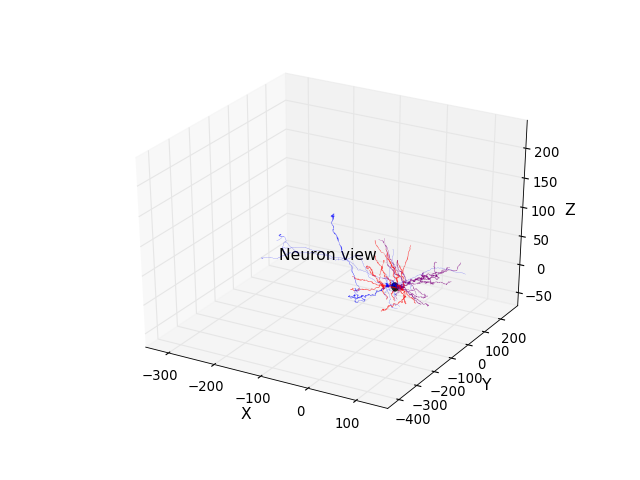

In [11]:
%matplotlib notebook
from neurom import fst, viewer
nrn = fst.load_neuron(fileName)
fig, ax = viewer.draw(nrn, mode='3d')